In [ ]:
# the Neuman–Witherspoon Model



In [2]:
# 1. Helper Functions

In [3]:
import numpy as np
from scipy.special import k0
from math import log, factorial

def G_laplace(p, b_prime, K_prime, S_prime):
    """ Laplace transform of the leakage memory function """
    eta = b_prime * np.sqrt(p * S_prime / K_prime)
    return np.tanh(eta) / eta

def stehfest_coefficients(N):
    """ Compute Stehfest coefficients for Laplace inversion """
    V = np.zeros(N)
    ln2 = log(2)
    for k in range(1, N + 1):
        sum_ = 0
        for j in range(int((k + 1) / 2), min(k, N // 2) + 1):
            num = j**(N // 2) * factorial(2 * j)
            den = (factorial(N // 2 - j) * factorial(j) * factorial(j - 1) *
                   factorial(k - j) * factorial(2 * j - k))
            sum_ += num / den
        V[k - 1] = sum_ * ((-1)**(k + N // 2))
    return V


In [4]:
# 2. Laplace-Space Solution

In [5]:
def s_laplace(r, p, Q, T, S, c, b_prime, K_prime, S_prime):
    """ Laplace domain solution of drawdown """
    Gp = G_laplace(p, b_prime, K_prime, S_prime)
    gamma2 = (p * S / T) + (Gp / (T * c))
    arg = r * np.sqrt(gamma2)
    return (Q / (2 * np.pi * T)) * k0(arg)


In [6]:
# 3. Time-Domain Inversion (Stehfest)

In [7]:
def neuman_witherspoon_drawdown(r, t, Q, T, S, b_prime, K_prime, S_prime, N=12):
    """
    Compute drawdown using the Neuman–Witherspoon model with aquitard storage.
    
    Parameters:
        r : float
            Radial distance [L]
        t : float
            Time [T]
        Q, T, S : float
            Pumping rate, transmissivity, and storativity
        b_prime, K_prime, S_prime : float
            Aquitard thickness, conductivity, and storativity
        N : int
            Number of terms for Stehfest (must be even)
    Returns:
        s : float
            Drawdown [L]
    """
    assert N % 2 == 0, "Stehfest N must be even"

    c = b_prime / K_prime
    ln2 = np.log(2)
    V = stehfest_coefficients(N)

    sum_ = 0
    for k in range(1, N + 1):
        p_k = k * ln2 / t
        s_lap = s_laplace(r, p_k, Q, T, S, c, b_prime, K_prime, S_prime)
        sum_ += V[k - 1] * s_lap

    return ln2 / t * sum_


In [8]:
# Example usage

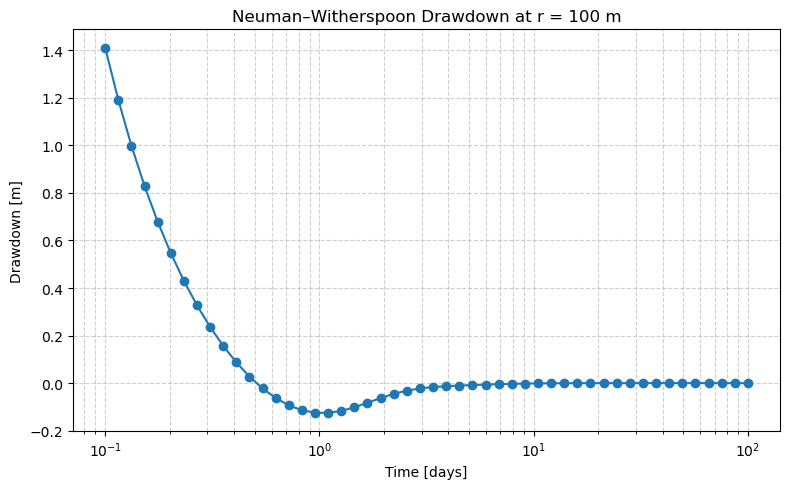

In [11]:
import matplotlib.pyplot as plt

# Parameters
Q = 1000         # m³/day
T = 500          # m²/day
S = 1e-4         # aquifer storage
b_prime = 10     # m
K_prime = 0.01   # m/day
S_prime = 1e-3   # aquitard storage
r = 100          # m

# Time vector for plotting
t_vals = np.logspace(-1, 2, 50)  # 0.1 to 100 days
s_vals = [neuman_witherspoon_drawdown(r, t, Q, T, S, b_prime, K_prime, S_prime) for t in t_vals]

# Plotting
plt.figure(figsize=(8,5))
plt.semilogx(t_vals, s_vals, marker='o')
plt.xlabel('Time [days]')
plt.ylabel('Drawdown [m]')
plt.title(f'Neuman–Witherspoon Drawdown at r = {r} m')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()